# TASK 02 : DATA PREPROCESSING

## Handle missing values and outliers appropriately . Normalize or scale features as needed . Split the data into training and testing sets.

### Importing all required libraries .

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 


### Loading dataset .

In [74]:
df = pd.read_csv("Dataset2.csv")
df.head()

,id,age,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,weight
0,0,18393.0,2,168,110.0,80,1.0,1,0,0.0,1.0,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1,85.0
1,1,20228.0,1,156,140.0,90,3.0,1,0,0.0,1.0,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2,64.0
2,2,18857.0,1,165,130.0,70,3.0,1,0,0.0,0.0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1,82.0
3,3,17623.0,2,169,150.0,100,1.0,1,0,0.0,1.0,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2,56.0
4,4,17474.0,1,156,100.0,60,1.0,1,0,0.0,0.0,0,47,23.011177,Normal,Normal,67.0


In [75]:
df.head()

,id,age,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,weight
0,0,18393.0,2,168,110.0,80,1.0,1,0,0.0,1.0,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1,85.0
1,1,20228.0,1,156,140.0,90,3.0,1,0,0.0,1.0,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2,64.0
2,2,18857.0,1,165,130.0,70,3.0,1,0,0.0,0.0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1,82.0
3,3,17623.0,2,169,150.0,100,1.0,1,0,0.0,1.0,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2,56.0
4,4,17474.0,1,156,100.0,60,1.0,1,0,0.0,0.0,0,47,23.011177,Normal,Normal,67.0


In [76]:
df.tail()

,id,age,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,weight
994,1421,14715.0,1,166,110.0,70,1.0,1,0,0.0,1.0,0,40,23.225432,Normal,Normal,64.0
995,1423,22401.0,1,158,130.0,90,1.0,2,0,0.0,1.0,1,61,32.046146,Hypertension Stage 1,Hypertension Stage 1,80.0
996,1426,18398.0,2,165,150.0,90,1.0,1,0,0.0,1.0,0,50,22.773186,Hypertension Stage 2,Hypertension Stage 2,62.0
997,1427,23362.0,2,171,120.0,80,1.0,1,0,0.0,1.0,0,64,23.255019,Hypertension Stage 1,Hypertension Stage 1,68.0
998,1429,21118.0,1,158,130.0,80,1.0,1,0,0.0,0.0,0,57,31.645570,Hypertension Stage 1,Hypertension Stage 1,79.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   999 non-null    int64  
 1   age                  998 non-null    float64
 2   gender               999 non-null    int64  
 3   height               999 non-null    int64  
 4   ap_hi                998 non-null    float64
 5   ap_lo                999 non-null    int64  
 6   cholesterol          998 non-null    float64
 7   gluc                 999 non-null    int64  
 8   smoke                999 non-null    int64  
 9   alco                 998 non-null    float64
 10  active               998 non-null    float64
 11  cardio               999 non-null    int64  
 12  age_years            999 non-null    int64  
 13  bmi                  998 non-null    float64
 14  bp_category          997 non-null    object 
 15  bp_category_encoded  999 non-null    obj

## Data Cleaning .

In [78]:
#identifying duplicate values
dup_row=df[df.duplicated()]
if len(dup_row)>0:
    print("Duplicated Rows:")
    print(dup_row)
else:
    print("No Duplicated Rows")

No Duplicated Rows


### Handling the missing values . 

In [79]:
#identifying missing values
missingValues=df.isnull().sum()

print("Missing Values")
print(missingValues)

Missing Values
id                     0
age                    1
gender                 0
height                 0
ap_hi                  1
ap_lo                  0
cholesterol            1
gluc                   0
smoke                  0
alco                   1
active                 1
cardio                 0
age_years              0
bmi                    1
bp_category            2
bp_category_encoded    0
weight                 0
dtype: int64


In [80]:
df_dropped_rows = df.dropna()
print(df_dropped_rows)

       id      age  gender  height  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0       0  18393.0       2     168  110.0     80          1.0     1      0   
1       1  20228.0       1     156  140.0     90          3.0     1      0   
2       2  18857.0       1     165  130.0     70          3.0     1      0   
3       3  17623.0       2     169  150.0    100          1.0     1      0   
4       4  17474.0       1     156  100.0     60          1.0     1      0   
..    ...      ...     ...     ...    ...    ...          ...   ...    ...   
994  1421  14715.0       1     166  110.0     70          1.0     1      0   
995  1423  22401.0       1     158  130.0     90          1.0     2      0   
996  1426  18398.0       2     165  150.0     90          1.0     1      0   
997  1427  23362.0       2     171  120.0     80          1.0     1      0   
998  1429  21118.0       1     158  130.0     80          1.0     1      0   

     alco  active  cardio  age_years        bmi           bp_ca

In [81]:
df_dropped_rows.info()


<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 998
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   991 non-null    int64  
 1   age                  991 non-null    float64
 2   gender               991 non-null    int64  
 3   height               991 non-null    int64  
 4   ap_hi                991 non-null    float64
 5   ap_lo                991 non-null    int64  
 6   cholesterol          991 non-null    float64
 7   gluc                 991 non-null    int64  
 8   smoke                991 non-null    int64  
 9   alco                 991 non-null    float64
 10  active               991 non-null    float64
 11  cardio               991 non-null    int64  
 12  age_years            991 non-null    int64  
 13  bmi                  991 non-null    float64
 14  bp_category          991 non-null    object 
 15  bp_category_encoded  991 non-null    object 


### Handling Outliers . 

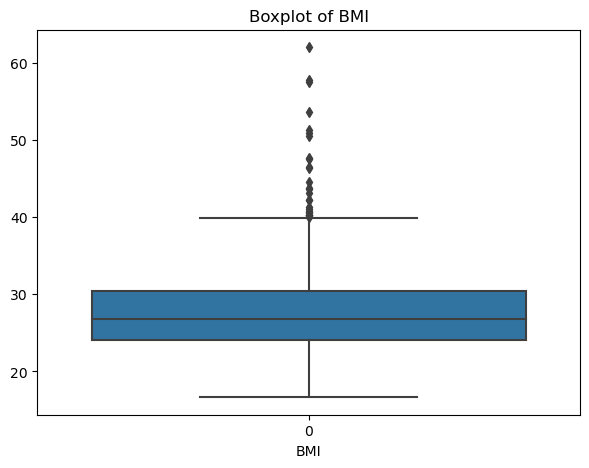

In [82]:
#checking the outliers for bmi
plt.figure(figsize=(7,5))
sns.boxplot(df['bmi'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()


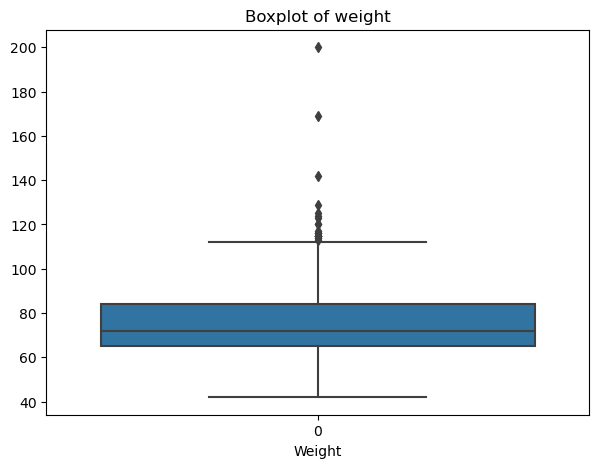

In [83]:
#checking the outliers for weight
plt.figure(figsize=(7,5))
sns.boxplot(df['weight'])
plt.title('Boxplot of weight')
plt.xlabel('Weight')
plt.show()

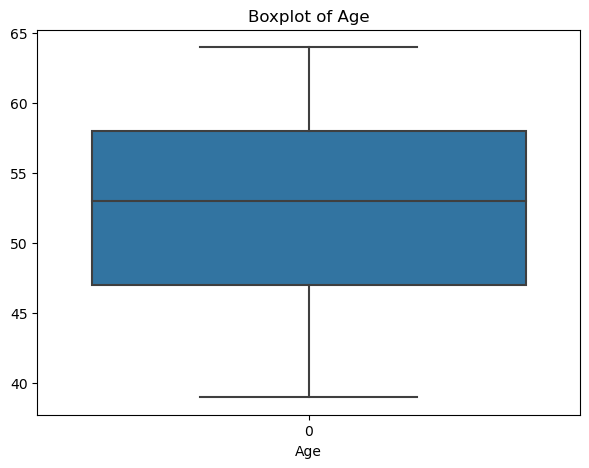

In [84]:
#checking the outliers for age
plt.figure(figsize=(7,5))
sns.boxplot(df['age_years'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

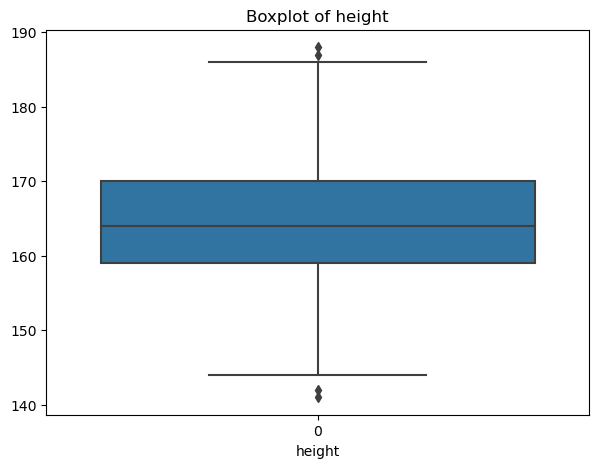

In [85]:
#checking the outliers for height
plt.figure(figsize=(7,5))
sns.boxplot(df['height'])
plt.title('Boxplot of height')
plt.xlabel('height')
plt.show()

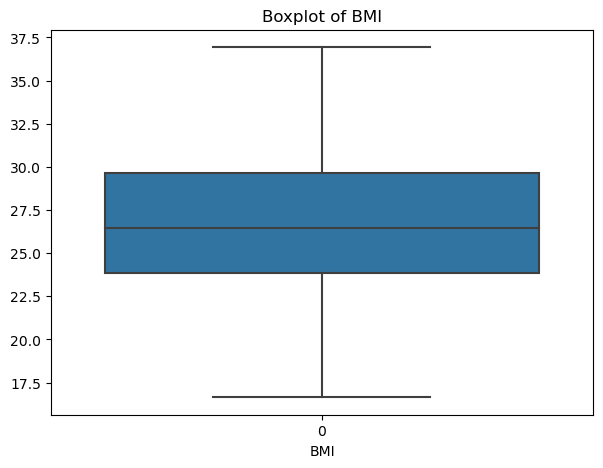

In [86]:
#to remove outliers
df = df[df['bmi'] <= 37]

#checking the outliers for bmi
plt.figure(figsize=(7,5))
sns.boxplot(df['bmi'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

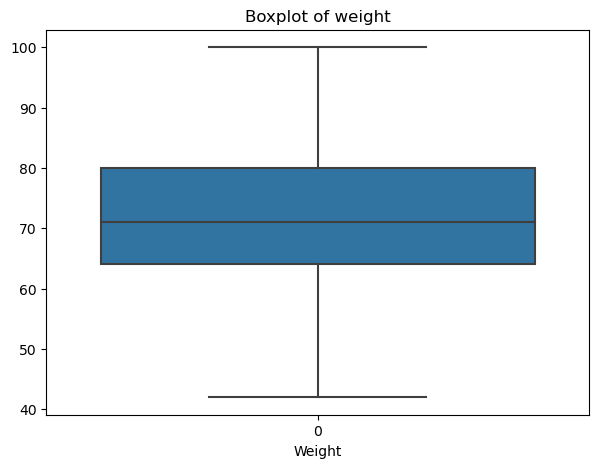

In [87]:
#to remove outliers
df = df[df['weight']<=100]

#checking the outliers for weight
plt.figure(figsize=(7,5))
sns.boxplot(df['weight'])
plt.title('Boxplot of weight')
plt.xlabel('Weight')
plt.show()

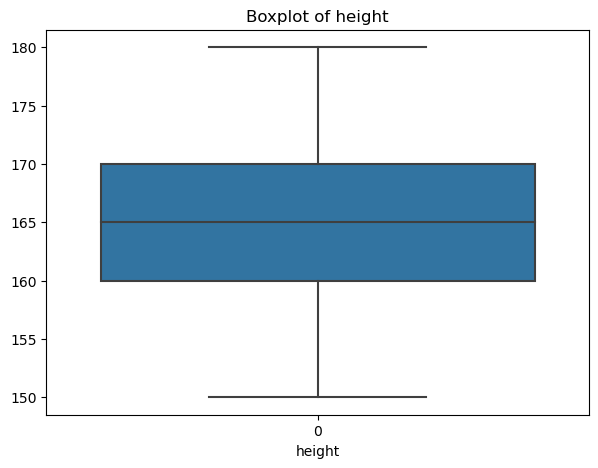

In [88]:
#to remove outliers
df = df[df['height']<=180]
df = df[df['height']>=150]

#checking the outliers for height
plt.figure(figsize=(7,5))
sns.boxplot(df['height'])
plt.title('Boxplot of height')
plt.xlabel('height')
plt.show()

In [89]:
x=df.drop(['id','bp_category','bp_category_encoded','age'],axis=1)
y=df['bp_category']
x,y

(     gender  height  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
 0         2     168  110.0     80          1.0     1      0   0.0     1.0   
 1         1     156  140.0     90          3.0     1      0   0.0     1.0   
 2         1     165  130.0     70          3.0     1      0   0.0     0.0   
 3         2     169  150.0    100          1.0     1      0   0.0     1.0   
 4         1     156  100.0     60          1.0     1      0   0.0     0.0   
 ..      ...     ...    ...    ...          ...   ...    ...   ...     ...   
 994       1     166  110.0     70          1.0     1      0   0.0     1.0   
 995       1     158  130.0     90          1.0     2      0   0.0     1.0   
 996       2     165  150.0     90          1.0     1      0   0.0     1.0   
 997       2     171  120.0     80          1.0     1      0   0.0     1.0   
 998       1     158  130.0     80          1.0     1      0   0.0     0.0   
 
      cardio  age_years        bmi  weight  
 0         0     

### Spit the data into training and testing sets .

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Normalizing the features . 

In [91]:
# Standardizing the features 
x= StandardScaler().fit_transform(x) 